# RFM Analysis

The following dataset contains some categorical or numerical variables belonging to customers.

These variables are:
* **'GuestID'**: Identification Number of Guest
* **'Status'**: Status of Booking
* **'RoomGroupID'**: Identification Number of Room Group
* **'CreatedDate'**: Date of Creating Booking
* **'ArrivalDate'**: Date of Arrival
* **'DepartureDate'**: Date of Departure
* **'RoomPrice'**: Price of Room per Day
* **'Channel'**: Channel of Booking
* **'RoomNo'**: Identification Number of Room
* **'Country'**: Country of Guest
* **'Adults'**: Number of Adults
* **'Children'**: Number of Children
* **'TotalPayment'**: Total Fee Paid

The Guest ID is not unique because a customer can make more than one reservation. Even a pair **(GuestID, ArrivalDate)** can be duplicated if the customer booked more than 1 room in a day for family, a group of friends, or the entire company.

### Import libraries and set up some cosmetic settings

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

### Read and copy the dataset

In [155]:
df_ = pd.read_csv("/Users/hikmetburakozcan/Exercises/Datasets/bookings.csv")
df = df_.copy()

### A quick look at the dataset

In [156]:
df.head()

,GuestID,Status,RoomGroupID,CreatedDate,ArrivalDate,DepartureDate,RoomPrice,Channel,RoomNo,Country,Adults,Children,TotalPayment
0,53801,O,1,2017-12-19,2018-09-09,2018-09-19,230.8900,NaN,467.0000,au,3,0,2309.9300
1,37129,O,1,2017-12-20,2018-01-03,2018-01-05,170.1500,other,467.0000,us,0,0,340.9400
2,37708,O,1,2017-12-20,2018-01-17,2018-01-20,176.8100,NaN,647.0000,jp,0,0,542.5900
3,41515,O,1,2017-12-20,2018-02-18,2018-02-23,226.8000,NaN,508.0000,gb,1,0,1134.2900
4,37390,O,1,2017-12-21,2018-01-11,2018-01-12,129.8000,offline,529.0000,cn,1,0,140.5900


In [157]:
df.tail()

,GuestID,Status,RoomGroupID,CreatedDate,ArrivalDate,DepartureDate,RoomPrice,Channel,RoomNo,Country,Adults,Children,TotalPayment
9995,131389,O,1,2020-01-10,2020-01-13,2020-01-19,217.0800,offline,625.0000,il,0,0,1306.4000
9996,195075,O,1,2020-01-11,2020-01-14,2020-01-15,205.3300,NaN,608.0000,au,2,0,212.2100
9997,37753,O,1,2020-01-11,2020-01-26,2020-01-31,219.3300,other,617.0000,in,1,0,1102.8500
9998,144192,O,2,2020-01-12,2020-01-15,2020-01-16,248.1600,NaN,456.0000,ca,2,0,259.0600
9999,134673,O,1,2020-01-13,2020-01-16,2020-01-17,192.3800,other,767.0000,cn,1,0,196.6600


In [158]:
df.shape

(10000, 13)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GuestID        10000 non-null  int64  
 1   Status         10000 non-null  object 
 2   RoomGroupID    10000 non-null  int64  
 3   CreatedDate    10000 non-null  object 
 4   ArrivalDate    10000 non-null  object 
 5   DepartureDate  10000 non-null  object 
 6   RoomPrice      10000 non-null  float64
 7   Channel        6281 non-null   object 
 8   RoomNo         9790 non-null   float64
 9   Country        9518 non-null   object 
 10  Adults         10000 non-null  int64  
 11  Children       10000 non-null  int64  
 12  TotalPayment   10000 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


In [160]:
df.isnull().sum()

GuestID             0
Status              0
RoomGroupID         0
CreatedDate         0
ArrivalDate         0
DepartureDate       0
RoomPrice           0
Channel          3719
RoomNo            210
Country           482
Adults              0
Children            0
TotalPayment        0
dtype: int64

In [161]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GuestID,10000.0000,93701.7030,57906.2559,1.0000,46657.5000,68300.0000,133578.0000,209312.0000
RoomGroupID,10000.0000,1.2135,0.4256,1.0000,1.0000,1.0000,1.0000,3.0000
RoomPrice,10000.0000,205.2475,52.2294,0.0000,176.9800,208.6050,234.9300,507.2600
RoomNo,9790.0000,507.3632,167.3369,202.0000,358.0000,523.0000,651.0000,770.0000
Adults,10000.0000,1.4460,0.9707,0.0000,1.0000,1.0000,2.0000,4.0000
Children,10000.0000,0.0229,0.1720,0.0000,0.0000,0.0000,0.0000,2.0000
TotalPayment,10000.0000,627.6992,642.9681,1.4300,220.7425,383.5700,848.6975,8616.7100


In [162]:
df = df[~((df["Adults"] == 0) & (df["Children"] == 0))]

In [163]:
df = df[df["RoomPrice"] > 0]

In [164]:
df.describe(include="object").T

,count,unique,top,freq
Status,8130,4,O,7722
CreatedDate,8130,754,2018-05-11,22
ArrivalDate,8130,883,2018-09-29,21
DepartureDate,8130,877,2019-08-03,24
Channel,5294,3,online,2413
Country,7707,108,cn,1216


### Focus on NaN values

In [165]:
col_without_NaN = []
col_with_NaN = []
for col in df.columns:
    if any(df[col].isnull()):
        col_with_NaN.append(col)
    else:
        col_without_NaN.append(col)

In [166]:
col_with_NaN

['Channel', 'RoomNo', 'Country']

In [167]:
col_without_NaN

['GuestID',
 'Status',
 'RoomGroupID',
 'CreatedDate',
 'ArrivalDate',
 'DepartureDate',
 'RoomPrice',
 'Adults',
 'Children',
 'TotalPayment']

In [168]:
for col in col_with_NaN:
    print(col, ":", df[col].unique(), end='\n\n')

Channel : [nan 'offline' 'online' 'other']

RoomNo : [467. 508. 529. 364. 750. 338. 510. 620. 671. 231. 354. 309. 416. 606.
 723. 648. 641. 436. 214. 709. 550. 574. 528. 212. 438. 734. 371. 751.
 236. 353. 667. 616. 735. 677. 339. 576. 749. 225. 612. 522. 440. 659.
 711. 646. 336. 557. 534. 350. 411. 607. 450. 623. 244. 636. 632. 664.
 230. 372. 430. 472. 658. 518. 252. 649. 719. 262. 730. 346. 608. 628.
 305. 639. 566. 404. 368. 431. 342. 768. 541. 618. 274. 754. 755. 243.
 624. 348. 737. 268. 229. 219. 712. 257. 613. 272. 731. 357. 453. 328.
 661. 553. 465. 705. 631. 656. 377. 425. 253. 276. 247. 629. 241. 603.
 609. 601. 521. 208. 514. 373. 238. 233. 362. 331. 654. 216. 713. 640.
 443. 256. 330. 762. 310. 642. 745. 761. 264. 672. 366. 407. 511. 563.
 665. 743. 765. 317. 435. 621. 710. 544. 530. 302. 736. 240. 746. 758.
 207. 535. 316. 312. 451. 552.  nan 715. 215. 546. 556. 311. 432. 447.
 645. 653. 759. 271. 307. 254. 520. 228. 760. 203. 475. 237. 666. 267.
 327. 333. 421. 347. 767

### Fill NaN value

In [169]:
df["Channel"].fillna("other", inplace=True)
df["Country"].fillna("otr", inplace=True)

In [170]:
df.dropna(inplace=True)

### Define RFM metrics

In [171]:
df["DepartureDate"].max()

'2020-09-26'

In [172]:
analysis_date = dt.datetime(2020, 9, 28)

In [173]:
for col in df.columns[df.columns.str.contains("Date")]:
    df[col] = pd.to_datetime(df[col])

In [174]:
rfm = df.groupby("GuestID").agg({"DepartureDate": lambda x: (analysis_date - x.max()).days,
                                 "ArrivalDate": "nunique",
                                 "TotalPayment": "sum"})

In [175]:
rfm.columns = ['recency', 'frequency', 'monetary']

In [176]:
rfm.head()

,recency,frequency,monetary
GuestID,,,
1,365,1,1337.8900
37,484,2,278.4400
48,513,3,766.6200
156,415,2,1398.6000
191,393,2,937.5500


In [177]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,6245.0000,596.8331,210.2444,2.0000,417.0000,593.0000,773.0000,996.0000
frequency,6245.0000,1.2629,0.5811,1.0000,1.0000,1.0000,1.0000,9.0000
monetary,6245.0000,779.2144,873.1966,5.2400,234.1300,517.7200,1020.1800,22536.5000


### RFM Scores

In [180]:
rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str))
rfm["RF_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))

In [181]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,RF_SCORE
GuestID,,,,,,,,
1,365,1,1337.8900,5,1,5,515,51
37,484,2,278.4400,4,4,2,442,44
48,513,3,766.6200,4,5,4,454,45
156,415,2,1398.6000,4,4,5,445,44
191,393,2,937.5500,4,4,4,444,44


### Creating & Analysing RFM Segments

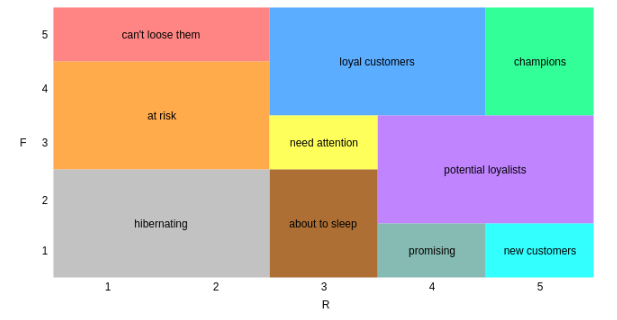

In [182]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

In [183]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,RF_SCORE,segment
GuestID,,,,,,,,,
1,365,1,1337.8900,5,1,5,515,51,new_customers
37,484,2,278.4400,4,4,2,442,44,loyal_customers
48,513,3,766.6200,4,5,4,454,45,loyal_customers
156,415,2,1398.6000,4,4,5,445,44,loyal_customers
191,393,2,937.5500,4,4,4,444,44,loyal_customers


In [184]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg("mean").sort_values("monetary", ascending=False)

,recency,frequency,monetary
segment,,,
cant_loose,806.7013,2.1636,1351.6976
loyal_customers,534.6931,1.7961,1045.6365
champions,309.3531,1.4641,979.5597
new_customers,323.4416,1.0000,763.9636
potential_loyalists,423.4923,1.0000,647.8885
promising,447.6863,1.0000,642.1903
at_Risk,756.3387,1.0241,607.1805
about_to_sleep,576.2303,1.0000,602.7207
hibernating,860.8626,1.0000,593.9447


### Target Customers

In [104]:
df_target = pd.DataFrame()
df_target["Customers_At_Risk"] = rfm[rfm["segment"] == "at_Risk"].index

In [105]:
df_target

,Customers_At_Risk
0,579
1,1268
2,1817
3,1918
4,2005
...,...
1021,185097
1022,185160
1023,185224
1024,185342
